# Separate countries from regions

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

In [2]:
pd.options.display.float_format = '{:,.0f}'.format

In [3]:
df = pd.read_csv('dataSets\\net_migration.csv', skiprows=3)

In [4]:
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       'Unnamed: 66'],
      dtype='object')

####  Cut down the years we won't use

In [5]:
df.drop(df.iloc[:, 3:34],axis = 1, inplace= True)

<Axes: >

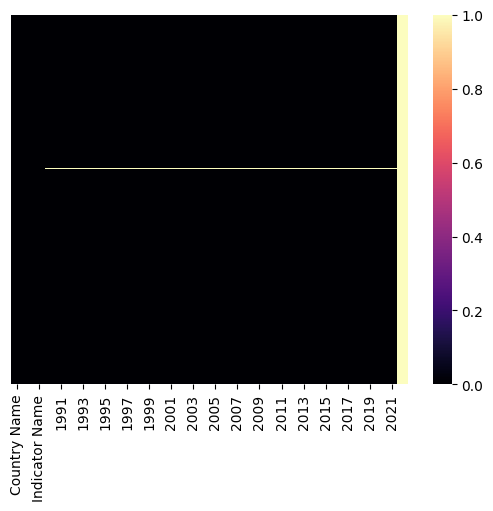

In [6]:
sns.heatmap(df.isna(),yticklabels=False,cmap = "magma")

In [7]:
df.drop(columns = ['Unnamed: 66', '2021'], inplace = True)

In [8]:
df = df[df['Country Name'] != 'Not classified'].reset_index(drop = True) 

In [9]:
df.isna().any().any()

False

In [10]:
def normalize_columns_names(data):
    
    data.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]
        
    return data

In [11]:
df = normalize_columns_names(df)

In [12]:
df.head()

,country_name,country_code,indicator_name,1990,1991,1992,1993,1994,1995,1996,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,Net migration,879,"1,946","1,294","1,662","1,668","1,598","1,636",...,315,229,134,88,177,170,218,367,412,0
1,Africa Eastern and Southern,AFE,Net migration,"22,815","-511,160","-556,663","-156,997","-391,945","-243,945","-427,138",...,"-683,611","-285,231","-92,842","-199,608","394,925","-864,708","-343,075","-366,105","-187,410","-48,955"
2,Afghanistan,AFG,Net migration,"-666,001","39,926","1,834,556","1,171,818","665,410","71,824","27,194",...,"418,796","105,905","48,076","255,611","-281,739","-90,238","-47,090","-47,205","-8,082","166,821"
3,Africa Western and Central,AFW,Net migration,"-529,414","-101,888","-72,380","-345,858","-198,790","10,350","-188,064",...,"-198,802","-435,876","-377,305","-280,418","-360,393","-167,286","-200,823","-255,888","-328,552","-99,761"
4,Angola,AGO,Net migration,"47,663","33,925","39,196","38,883","45,272","40,855","45,356",...,"94,709","96,056","91,528","84,532","74,170","91,623","77,733","61,632","58,986","7,557"


### Normalize data

#### Change data type in year columns

In [13]:
for column in df.iloc[:, 3:34]:
    df[column].astype(float)

In [14]:
#df.info()

In [15]:
# Filter the indicator name and normalize it
indicator_name = df.indicator_name.mode()[0].lower()
indicator_name = indicator_name.replace(' ', '_')

In [16]:
# Apply this value over the column
df.indicator_name = indicator_name

In [17]:
# replace chars
df.indicator_name = df.indicator_name.apply(lambda x: x.replace(' ', '_').strip())

In [18]:
# Normalize the first two columns
for column in df.iloc[:, :2]:
    df[column] = df[column].apply(lambda x: x.upper().strip())

### Now, let's identify the year columns with the corresponding indicator name

In [19]:
for column in df.iloc[:, 3:34]:
    df.rename(columns={column: f'{indicator_name}_{column}' }, inplace = True)

In [20]:
# Now, we can drop this column
df.drop(columns = 'indicator_name', inplace = True)

In [21]:
df.rename(columns = {'country_name	':'country_name'}, inplace = True)

#### Now we can separate the countries from the regions

In [22]:
region = ['AFRICA EASTERN AND SOUTHERN', 'AFRICA WESTERN AND CENTRAL', 'EAST ASIA & PACIFIC', 'EUROPE & CENTRAL ASIA',
          'LATIN AMERICA & CARIBBEAN', 'MIDDLE EAST & NORTH AFRICA', 'NORTH AMERICA', 'SOUTH ASIA', 'SUB-SAHARAN AFRICA',
          'WORLD']

In [23]:
income_levels =['HIGH INCOME', 'LOW & MIDDLE INCOME', 'LOW INCOME', 'LOWER MIDDLE INCOME', 'MIDDLE INCOME',
                'UPPER MIDDLE INCOME','WORLD']


In [24]:
dividends = ['POST-DEMOGRAPHIC DIVIDEND', 'PRE-DEMOGRAPHIC DIVIDEND', 'EARLY-DEMOGRAPHIC DIVIDEND','LATE-DEMOGRAPHIC DIVIDEND']

In [25]:
lending_groups =['IBRD ONLY', 'IDA BLEND', 'IDA & IBRD TOTAL', 'IDA ONLY', 'IDA TOTAL',
                 'EAST ASIA & PACIFIC (IDA & IBRD COUNTRIES)', 'EUROPE & CENTRAL ASIA (IDA & IBRD COUNTRIES)',
                 'LATIN AMERICA & THE CARIBBEAN (IDA & IBRD COUNTRIES)', 'MIDDLE EAST & NORTH AFRICA (IDA & IBRD COUNTRIES)',
                 'SOUTH ASIA (IDA & IBRD)', 'SUB-SAHARAN AFRICA (IDA & IBRD COUNTRIES)','WORLD']

In [26]:
small_states= ['CARIBBEAN SMALL STATES', 'OTHER SMALL STATES', 'PACIFIC ISLAND SMALL STATES', 'SMALL STATES','WORLD']

In [27]:
other_groups=['ARAB WORLD', 'CENTRAL EUROPE AND THE BALTICS', 'EAST ASIA & PACIFIC (EXCLUDING HIGH INCOME)',
              'EURO AREA', 'EUROPE & CENTRAL ASIA (EXCLUDING HIGH INCOME)', 'EUROPEAN UNION',
              'FRAGILE AND CONFLICT AFFECTED SITUATIONS', 'HEAVILY INDEBTED POOR COUNTRIES (HIPC)',
              'LATIN AMERICA & CARIBBEAN (EXCLUDING HIGH INCOME)', 'LEAST DEVELOPED COUNTRIES: UN CLASSIFICATION',
              'MIDDLE EAST & NORTH AFRICA (EXCLUDING HIGH INCOME)', 'OECD MEMBERS',
              'SUB-SAHARAN AFRICA (EXCLUDING HIGH INCOME)', 'WORLD']

## Filter the different regions

In [28]:
df = df[df['country_name'].isin(region) == False]
df= df[df['country_name'].isin(income_levels)== False]
df= df[df['country_name'].isin(dividends)== False]
df = df[df['country_name'].isin(lending_groups)== False]
df = df[df['country_name'].isin(small_states)== False]
df = df[df['country_name'].isin(other_groups) == False]

In [29]:
df.to_csv(f'dataSets\\countries_{indicator_name}_intermedio.csv', index = False)